Import essential libraries

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path1 = '/content/drive/MyDrive/logistic regression dataset/breast_cancer_modified.csv'
df1 = pd.read_csv(dataset_path1)

dataset_path2 = '/content/drive/MyDrive/logistic regression dataset/ionosphere_modified.csv'
df2 = pd.read_csv(dataset_path2)

# Dataset Analysis

In [ ]:
pd.set_option('display.max_columns', None)  # Set to None to display all columns

In [ ]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    return missing_values

In [ ]:
missing_values_df1 = check_missing_values(df1)
print("Missing values in each column:")
print(missing_values_df1)

Missing values in each column:
ID            0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Diagnosis     0
dtype: int64


In [ ]:
missing_values_df2 = check_missing_values(df2)
print("Missing values in each column:")
print(missing_values_df2)

Missing values in each column:
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
Feature_31    0
Feature_32    0
Feature_33    0
Feature_34    0
Label         0
dtype: int64


In [ ]:
df1.describe()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
df2.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1 = df1.drop(columns=['ID'])
df2 = df2.drop(columns=['Feature_2'])

In [ ]:
# Distribution of classes
print(df1['Diagnosis'].value_counts())
print(df2['Label'].value_counts())

B    357
M    212
Name: Diagnosis, dtype: int64
g    225
b    126
Name: Label, dtype: int64


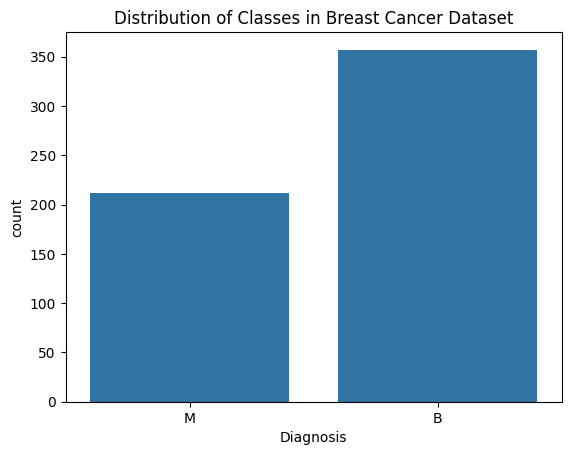

In [ ]:
# Class distribution for Breast Cancer dataset
sns.countplot(x='Diagnosis', data=df1)
plt.title('Distribution of Classes in Breast Cancer Dataset')
plt.show()

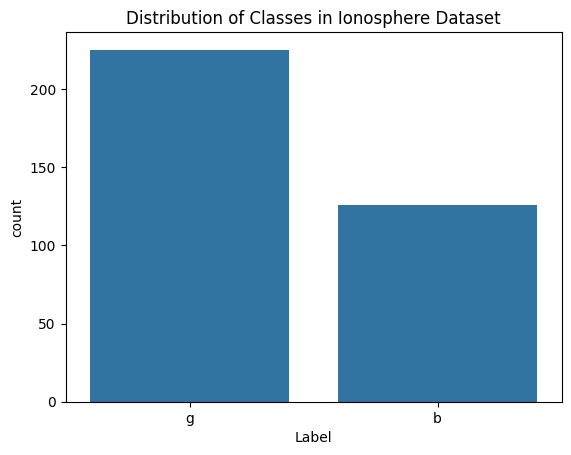

In [ ]:
# Class distribution for Ionosphere dataset
sns.countplot(x='Label', data=df2)
plt.title('Distribution of Classes in Ionosphere Dataset')
plt.show()

In [ ]:
def feature_distribution(df, name):
  features_io = df.columns[:-1]
  for feature in features_io:
      sns.histplot(df[feature], kde=True)
      plt.title(f'Distribution of {feature} - {name}')
      plt.show()

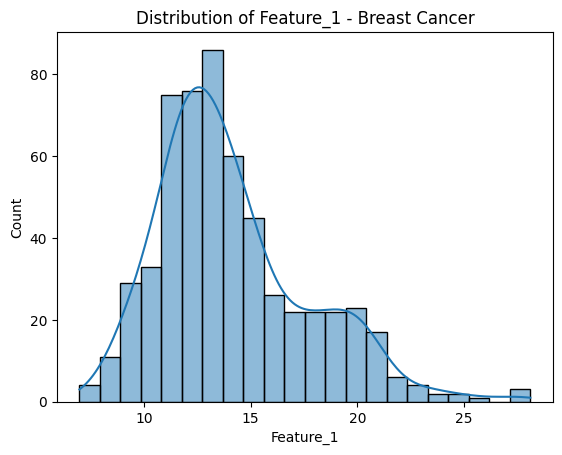

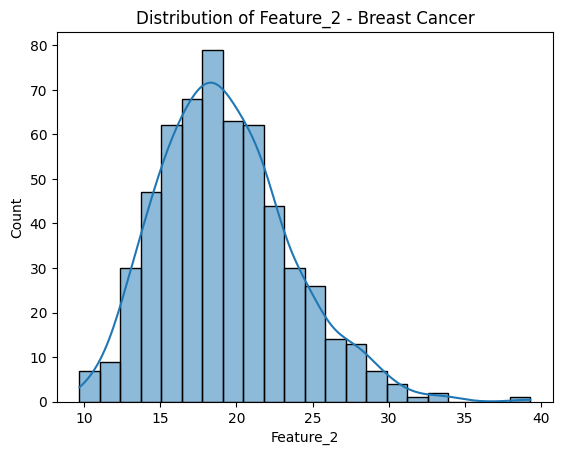

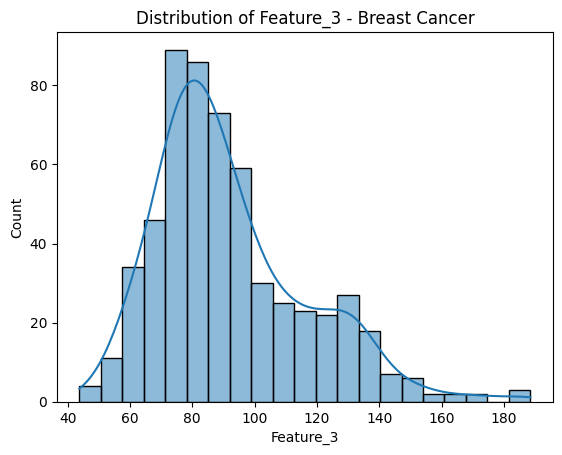

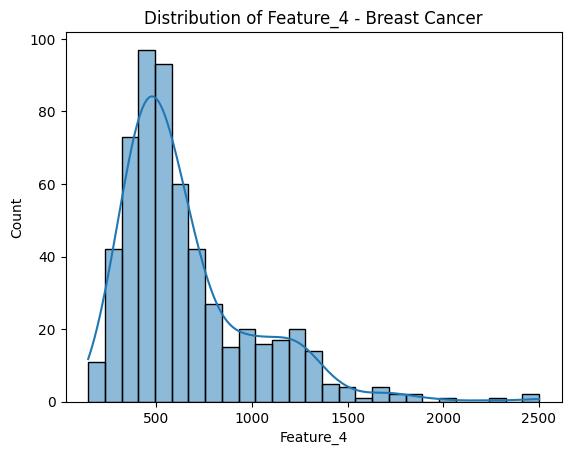

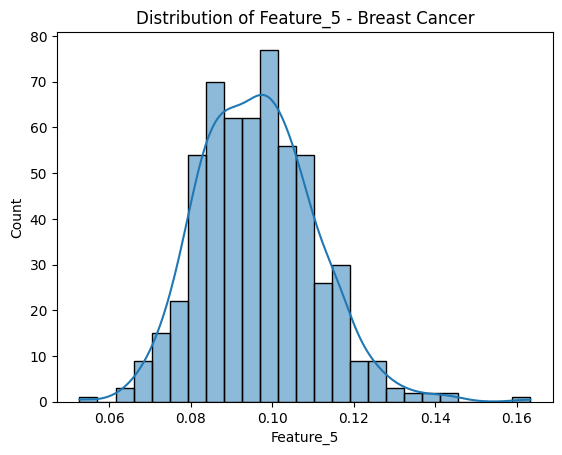

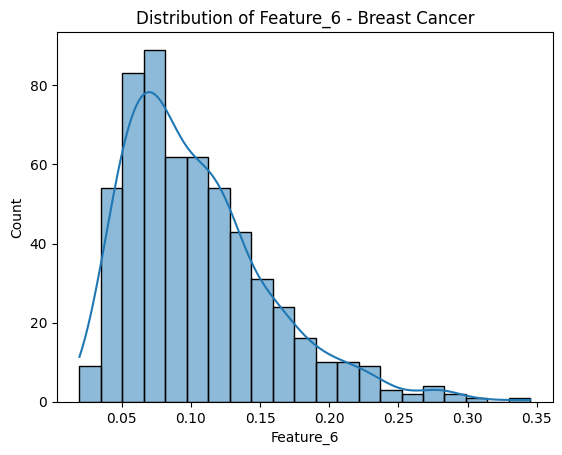

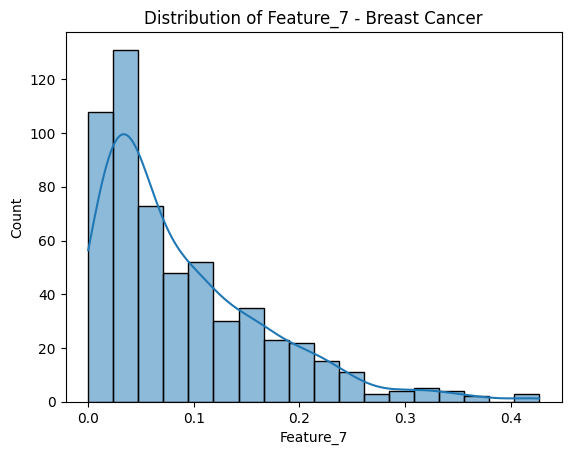

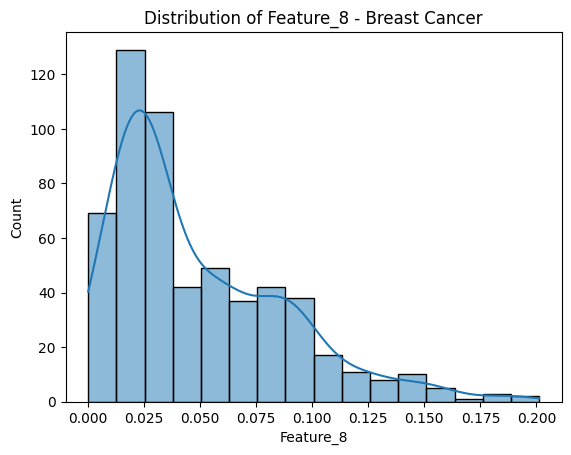

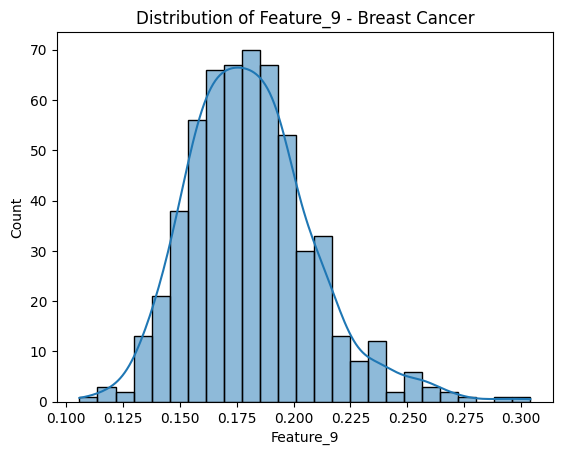

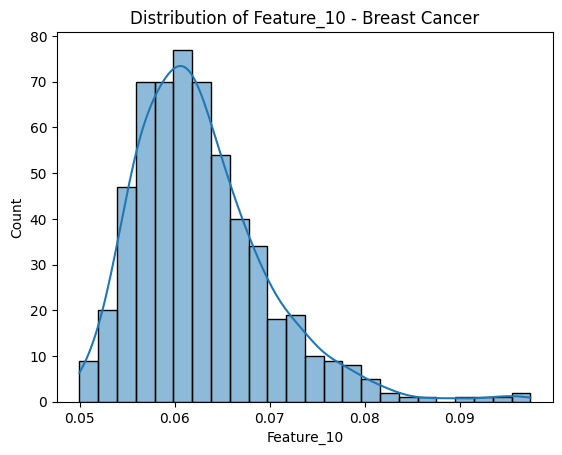

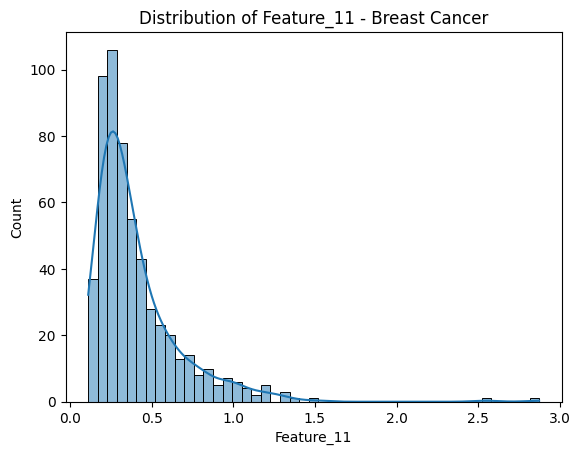

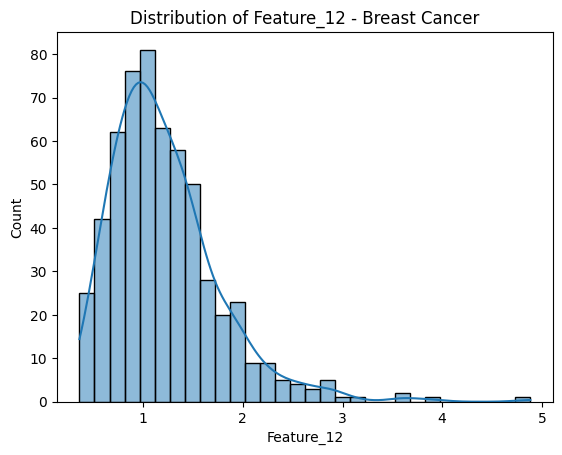

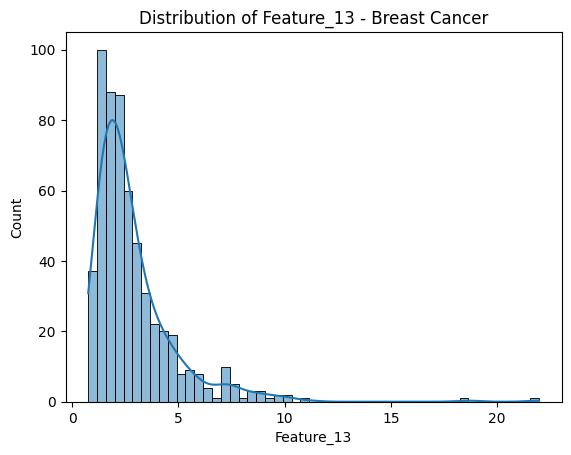

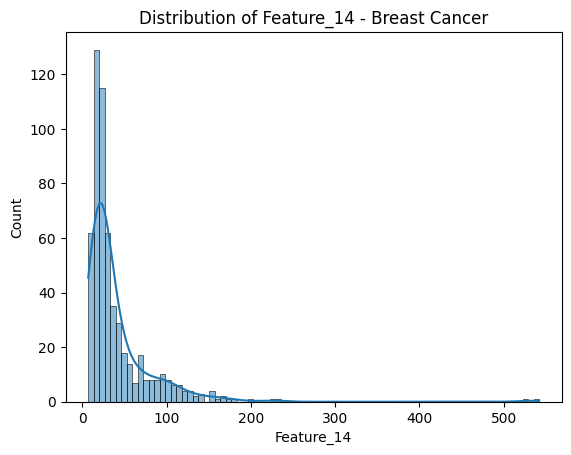

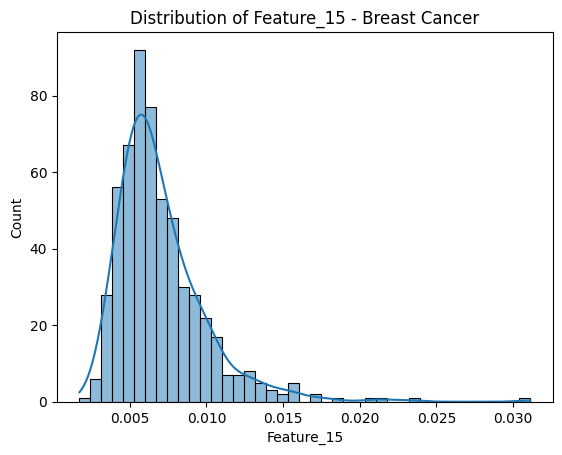

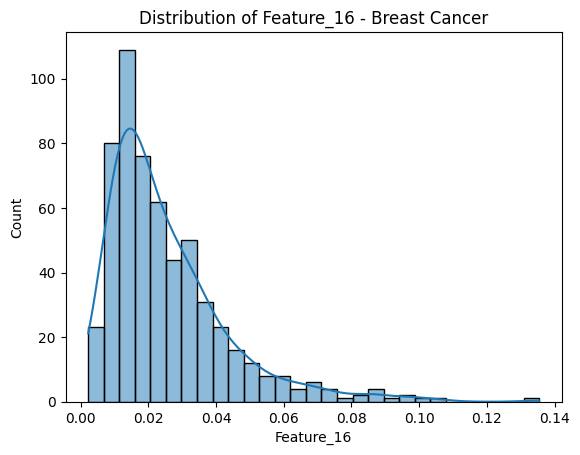

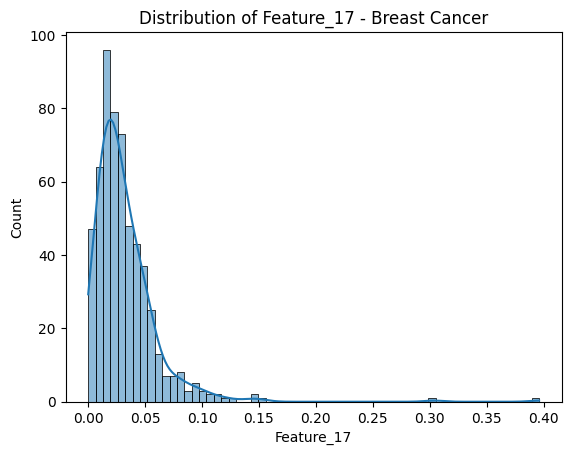

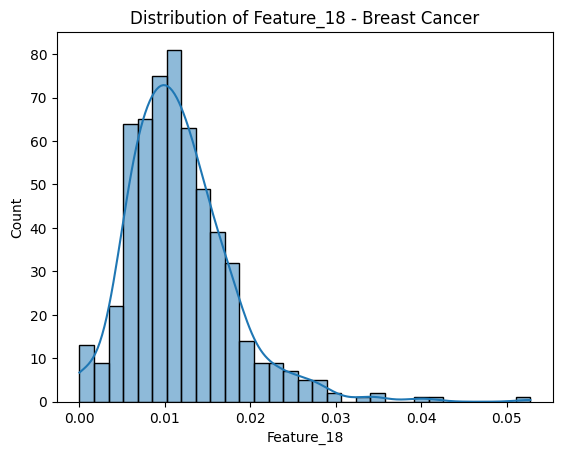

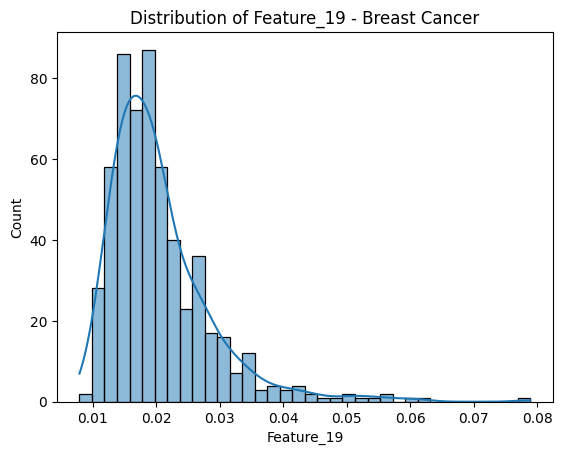

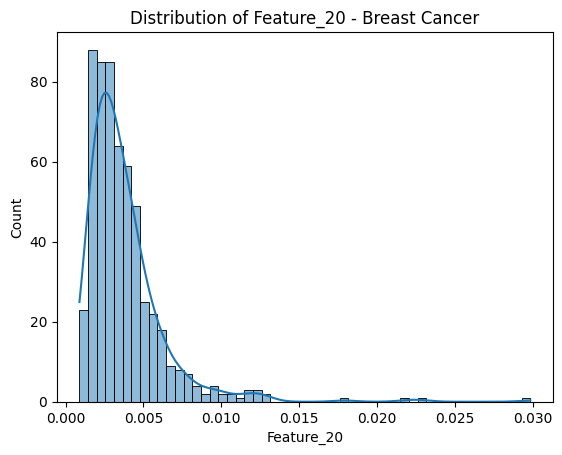

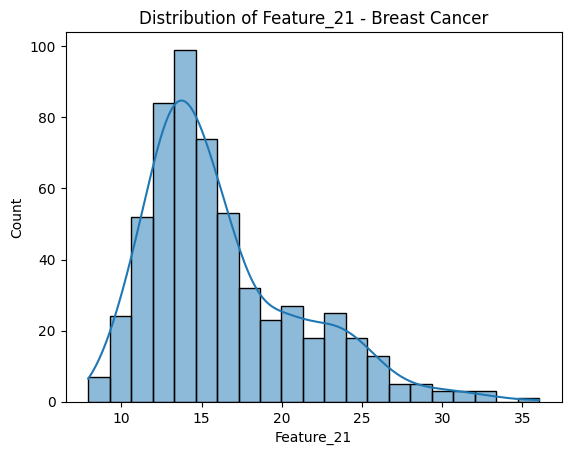

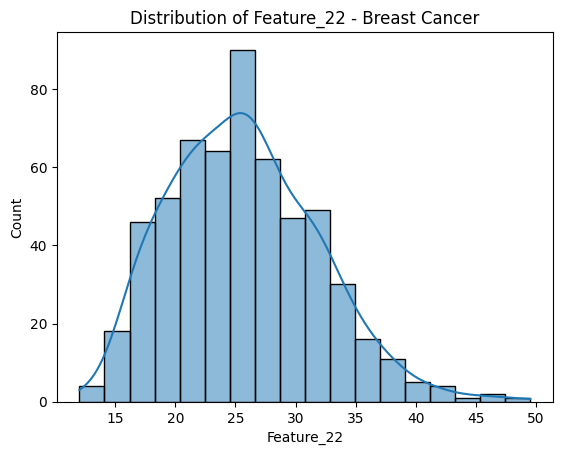

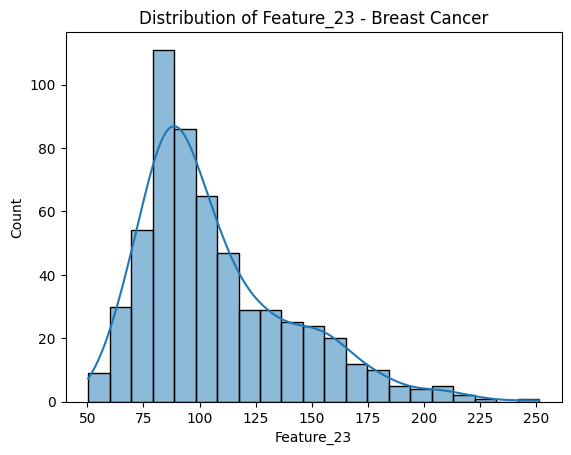

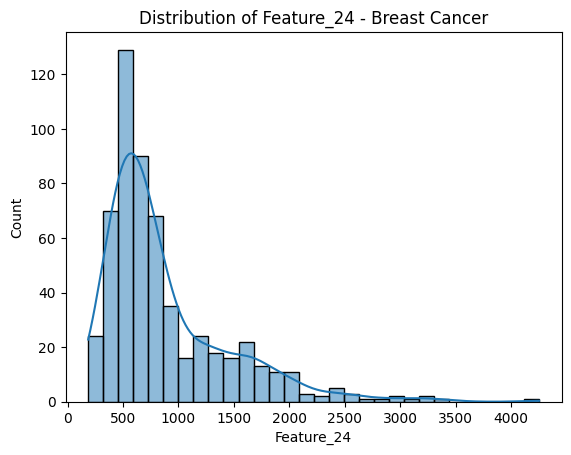

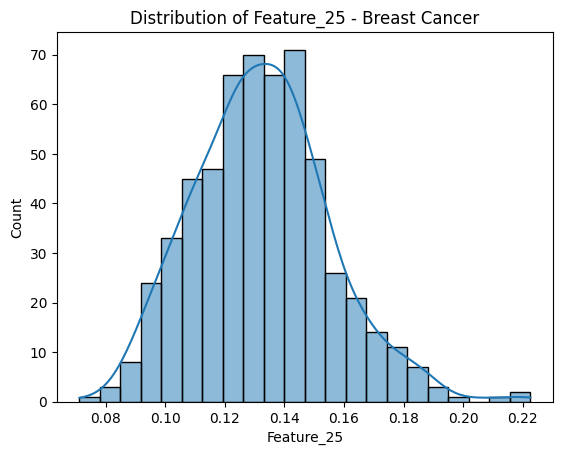

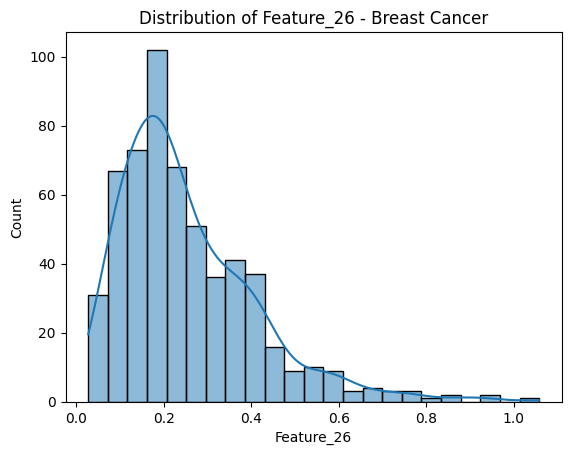

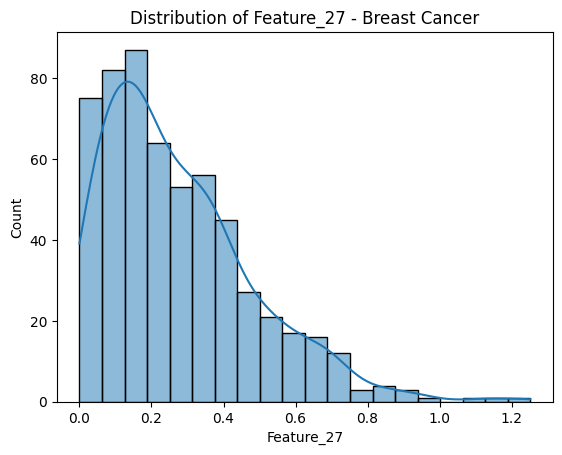

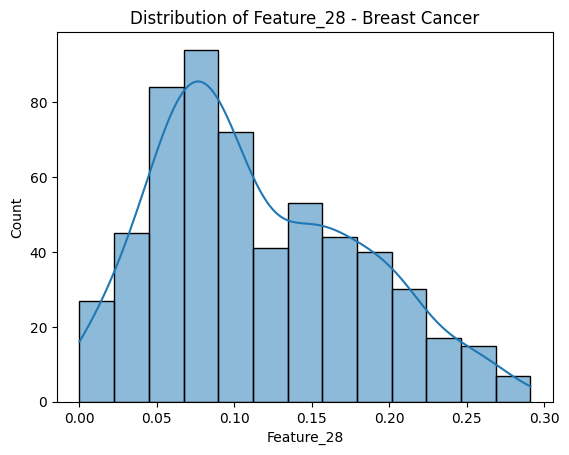

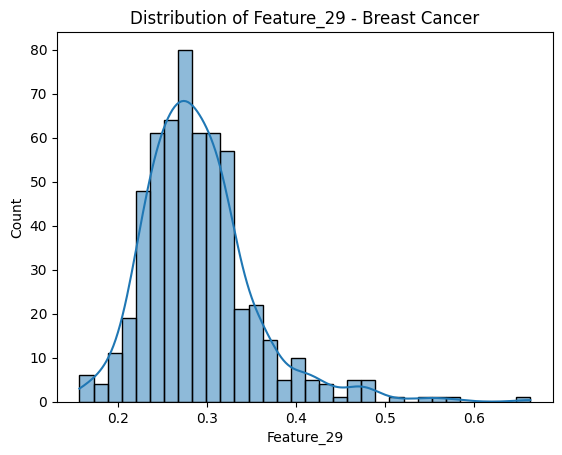

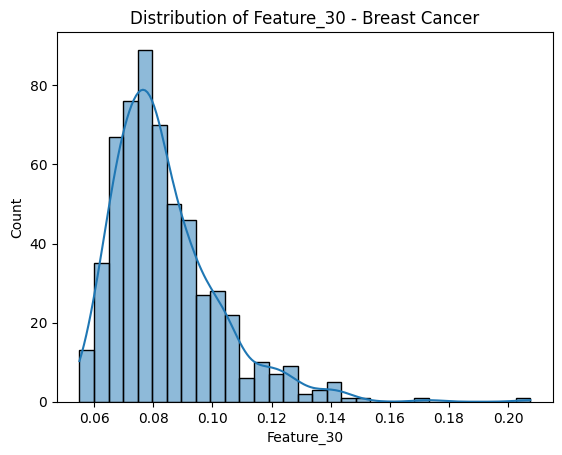

In [ ]:
feature_distribution(df1, 'Breast Cancer')

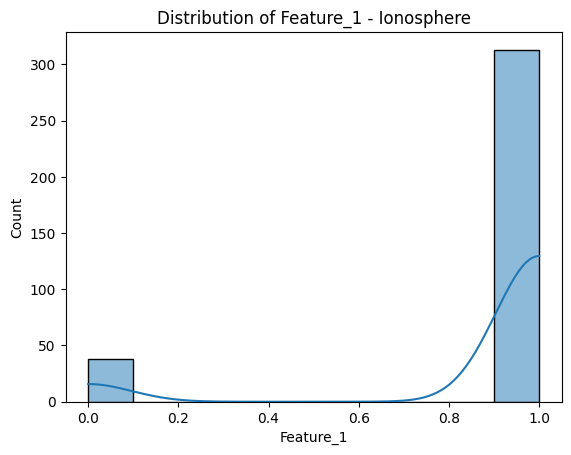

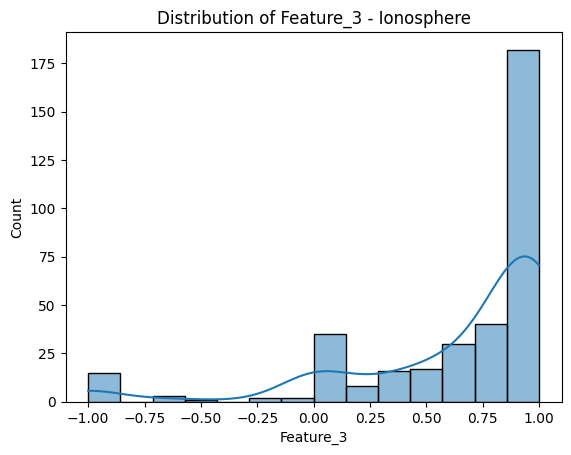

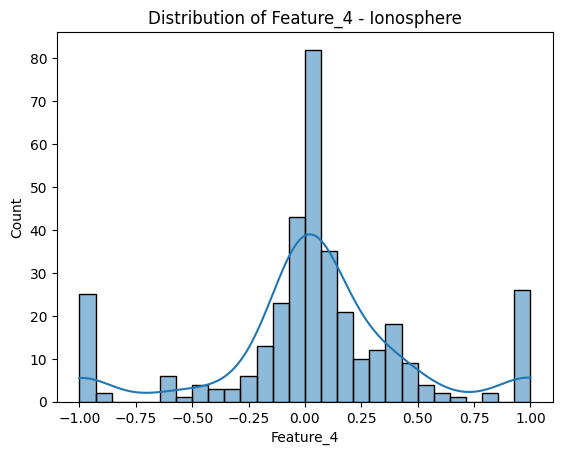

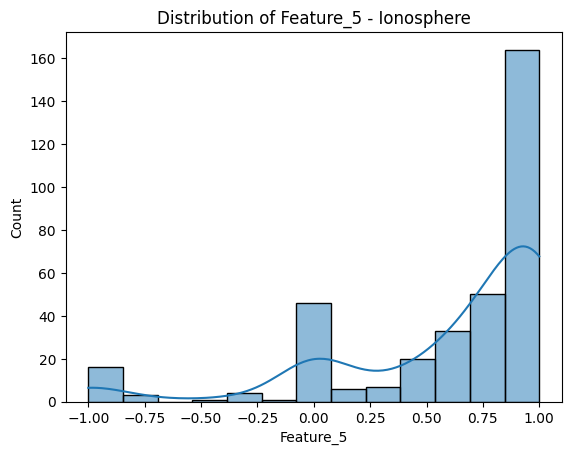

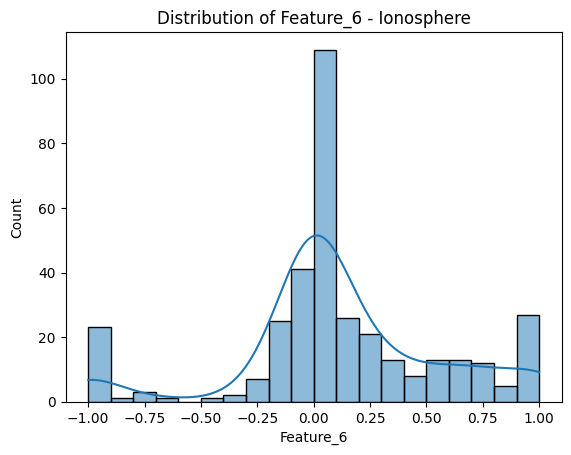

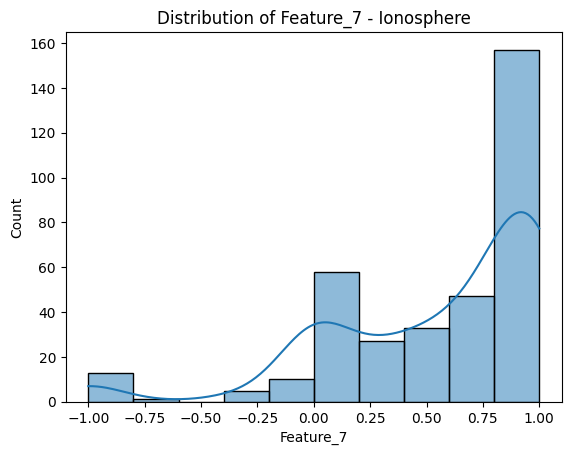

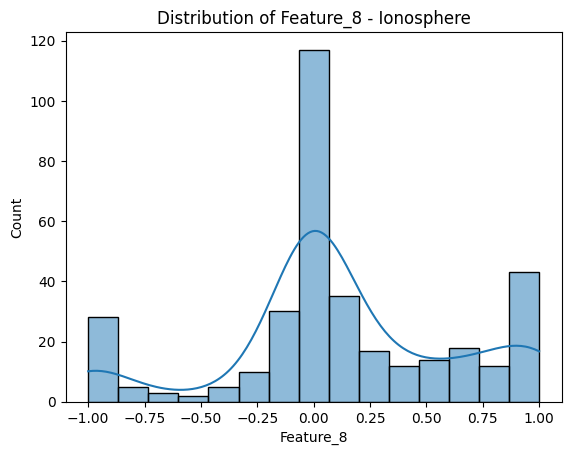

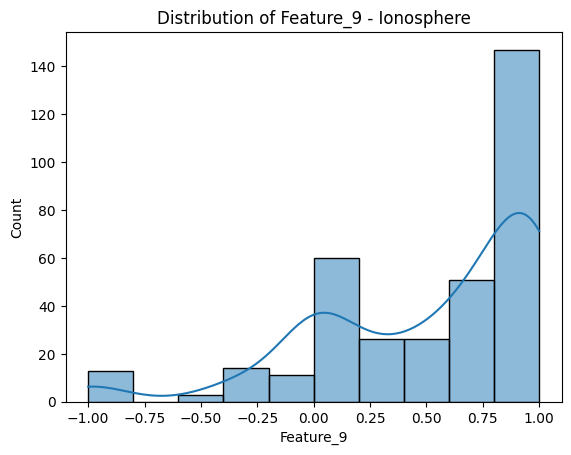

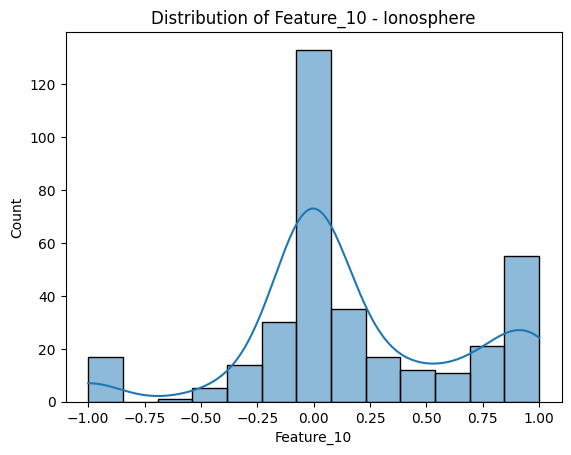

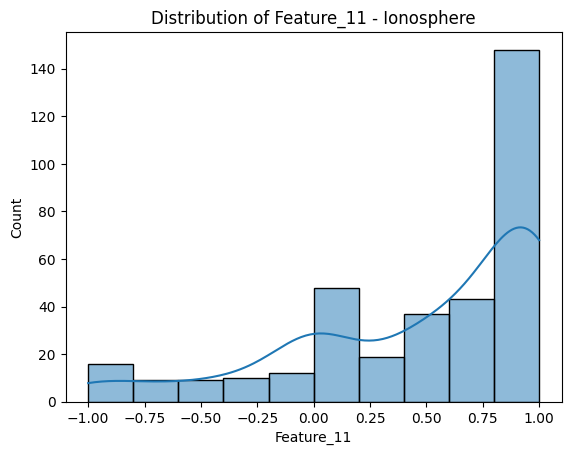

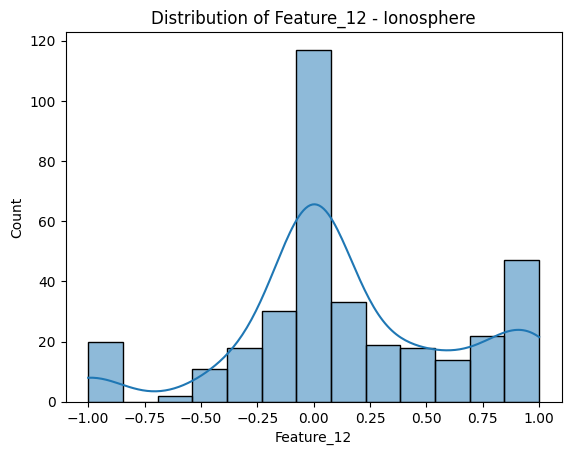

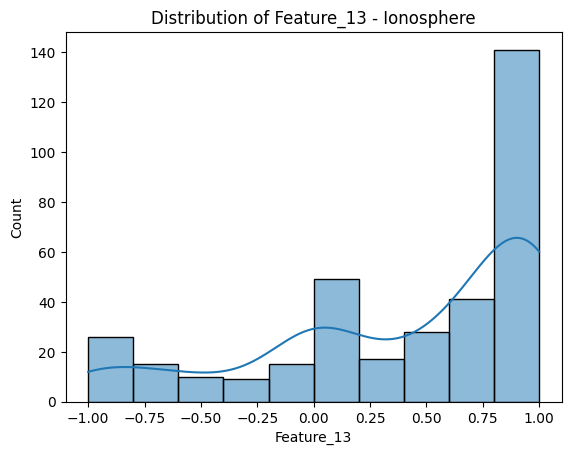

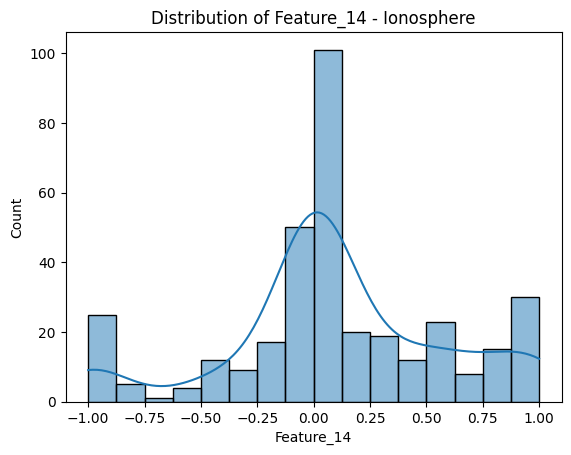

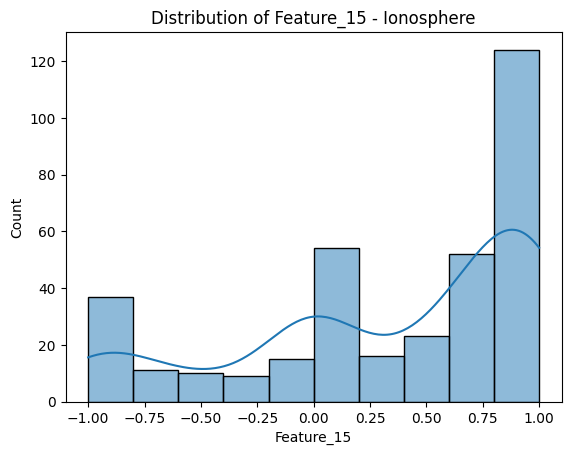

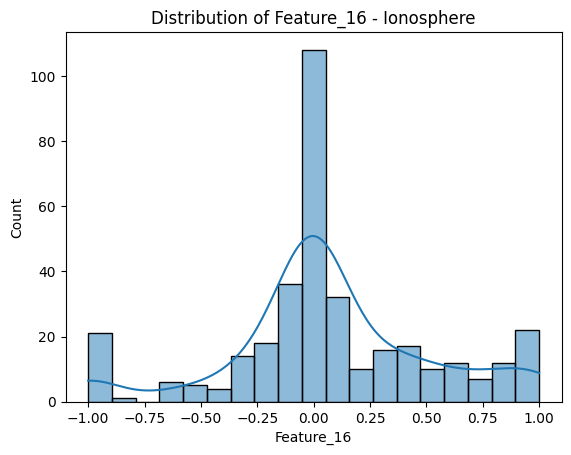

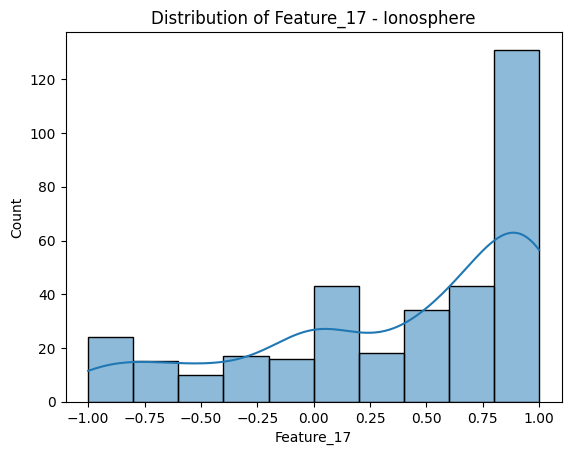

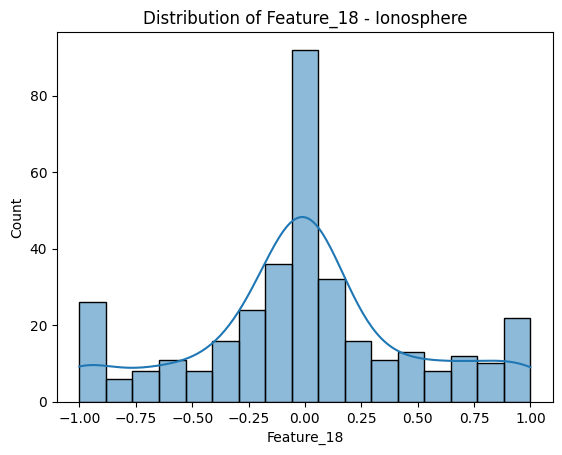

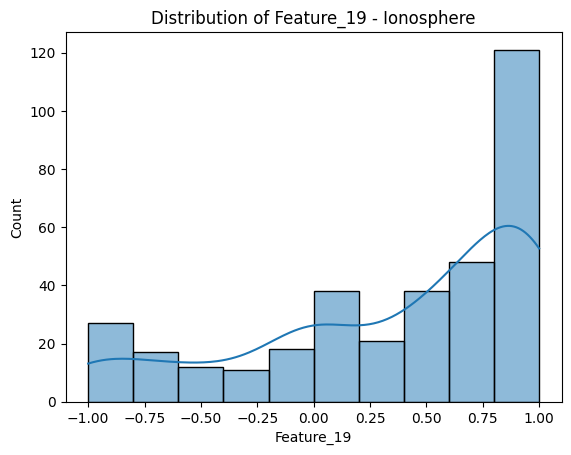

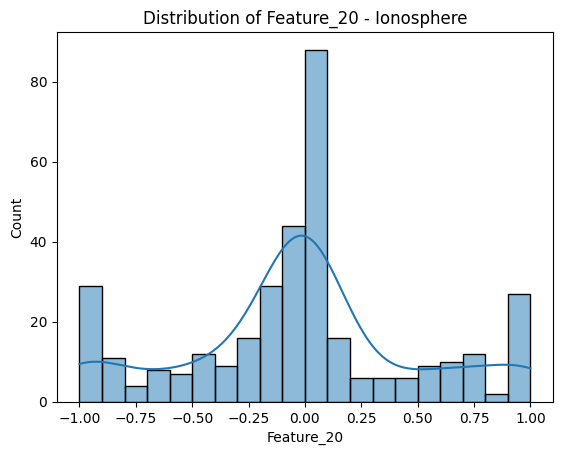

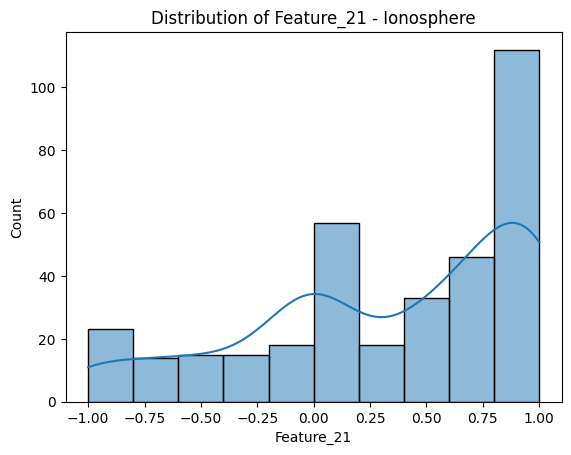

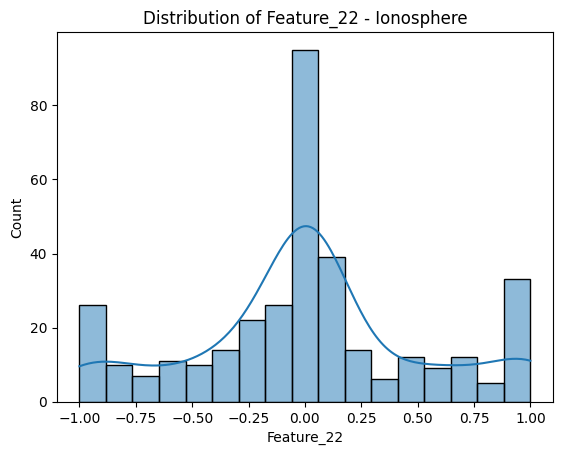

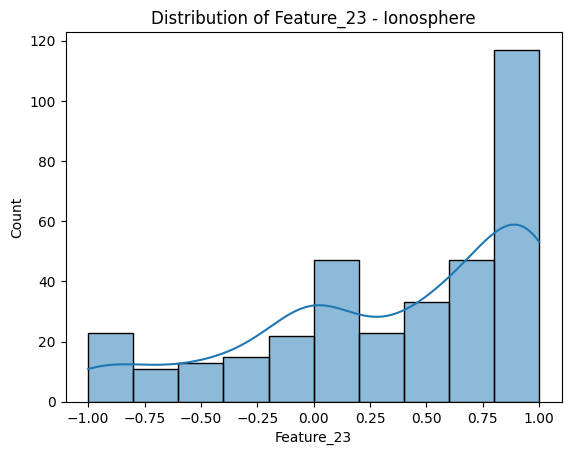

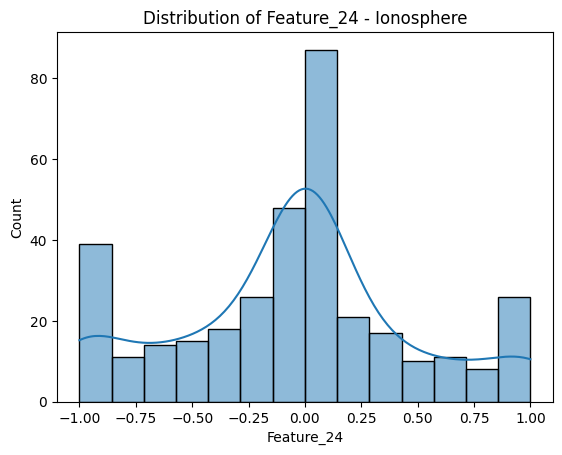

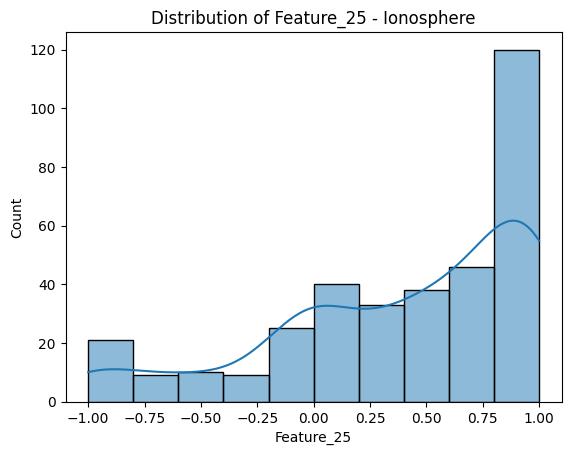

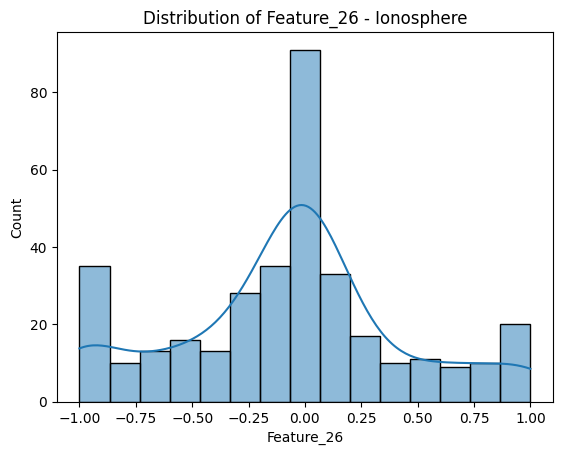

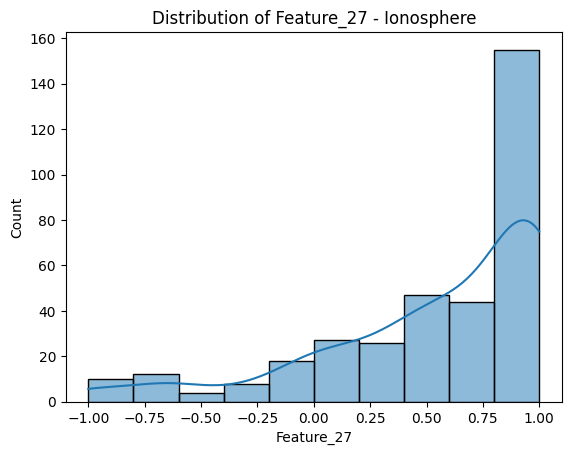

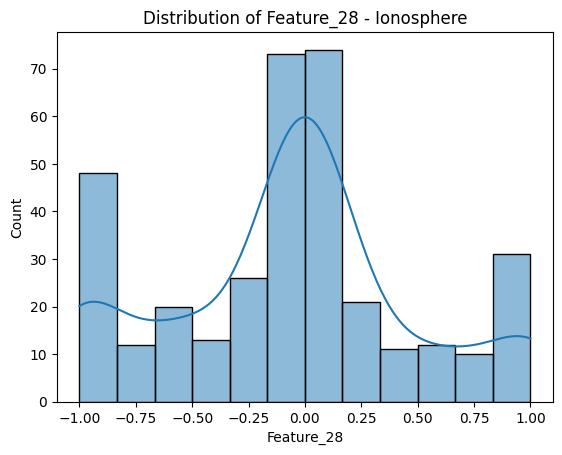

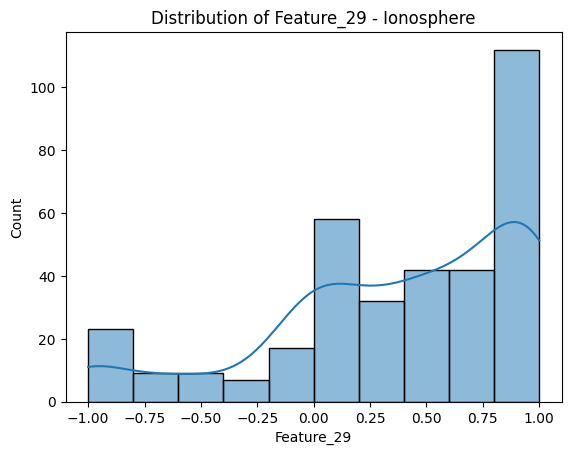

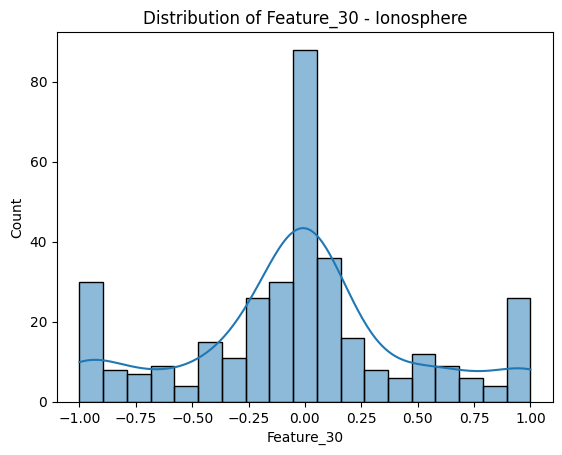

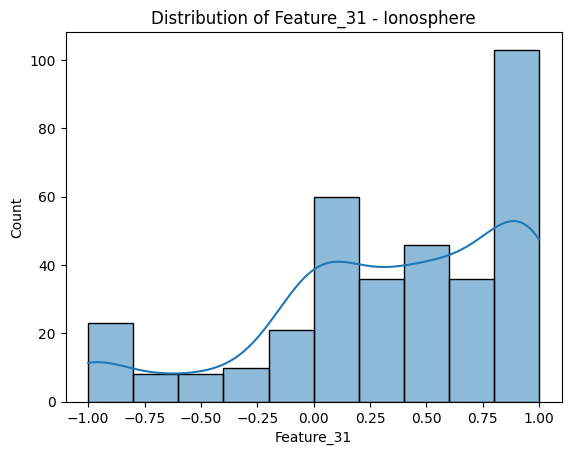

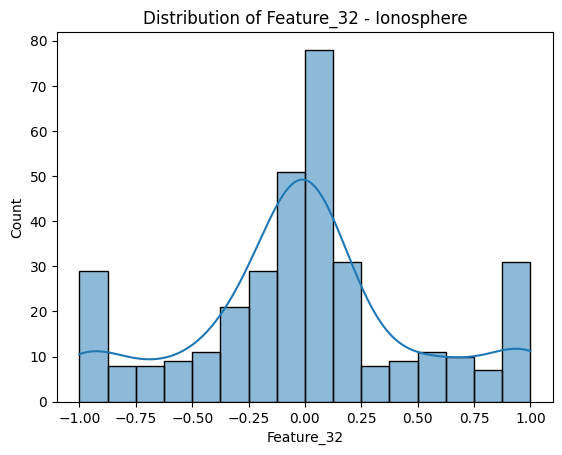

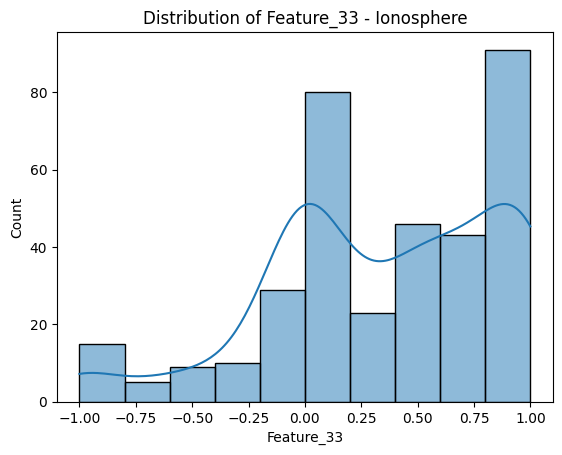

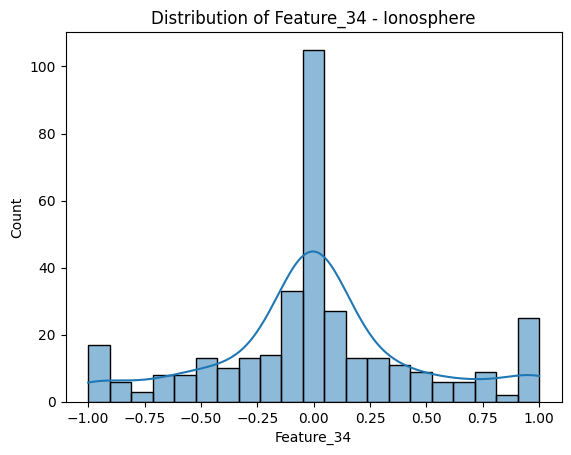

In [ ]:
feature_distribution(df2, 'Ionosphere')

In [ ]:
def visualize_correlation_matrix(df, title):
    corr_matrix = df.corr()
    # Mask to hide upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    f, ax = plt.subplots(figsize=(11, 9))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)


    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5},
                annot=False)  # Annotations are turned off for clarity
    plt.title(title)
    plt.show()

<ipython-input-57-0cde3e459a1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


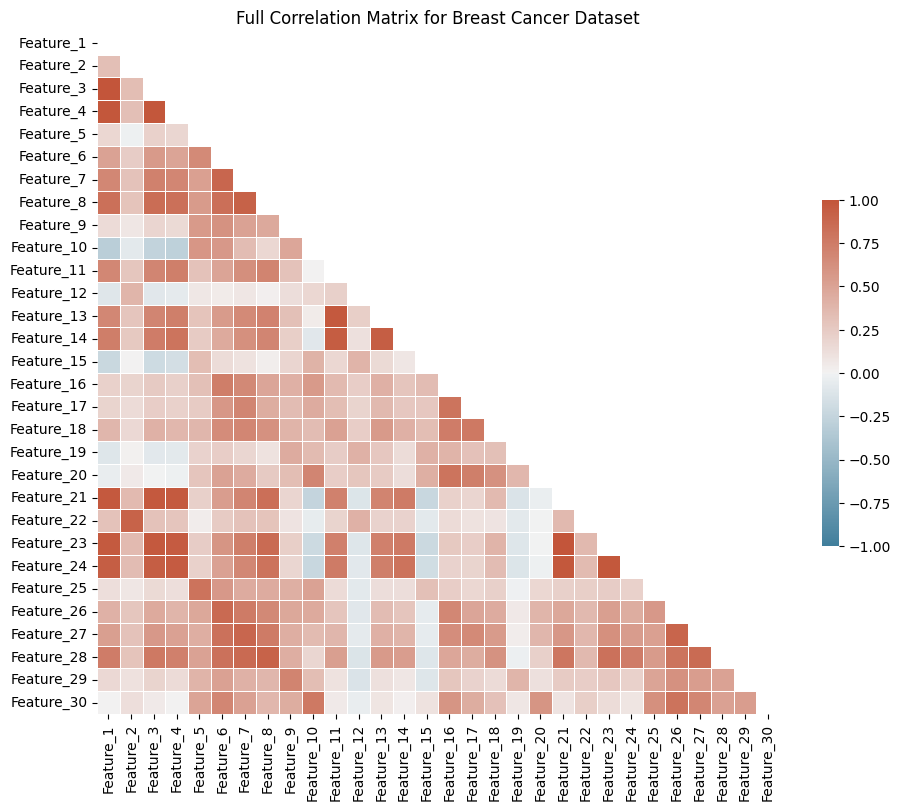

In [ ]:
visualize_correlation_matrix(df1, 'Full Correlation Matrix for Breast Cancer Dataset')

<ipython-input-57-0cde3e459a1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


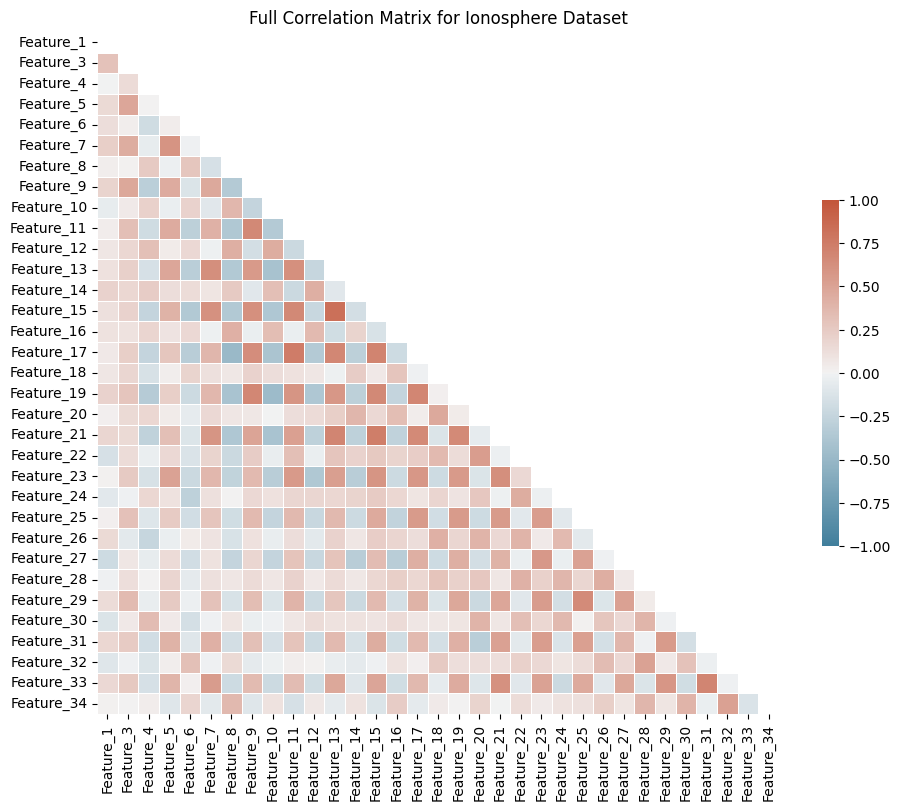

In [ ]:
visualize_correlation_matrix(df2, 'Full Correlation Matrix for Ionosphere Dataset')

# Preprocessing

Encode categorical variables

In [ ]:
df1['Diagnosis'] = df1['Diagnosis'].map({'B': 1, 'M': 0})
df2['Label'] = df2['Label'].map({'g': 1, 'b': 0})

In [ ]:
# select all features except the target
features_bc = df1.columns[:-1]
features_io = df2.columns[:-1]

In [ ]:
def normalize_features(df, feature_names):
    for feature in feature_names:
        min_value = df[feature].min()
        max_value = df[feature].max()
        df[feature] = (df[feature] - min_value) / (max_value - min_value)

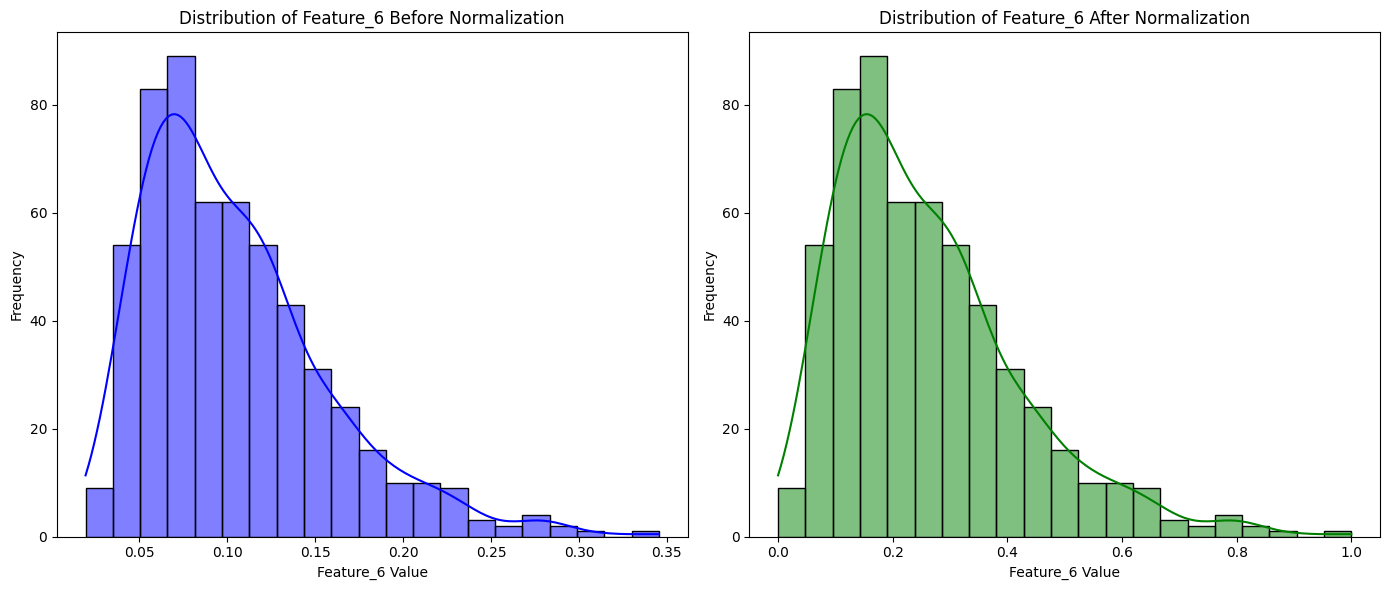

In [ ]:
# Choose a feature for demonstration
feature = features_bc[5]  # Replace with the actual feature name you are interested in

# Store a copy of the original feature values
original_feature_values = df1[feature].copy()

# Normalize the feature without altering the original dataframe
normalized_feature_values = (df1[feature] - df1[feature].min()) / (df1[feature].max() - df1[feature].min())

# Histogram comparison
plt.figure(figsize=(14, 6))

# Original feature histogram
plt.subplot(1, 2, 1)
sns.histplot(original_feature_values, kde=True, color="blue")
plt.title(f'Distribution of {feature} Before Normalization')
plt.xlabel(f'{feature} Value')
plt.ylabel('Frequency')

# Normalized feature histogram
plt.subplot(1, 2, 2)
sns.histplot(normalized_feature_values, kde=True, color="green")
plt.title(f'Distribution of {feature} After Normalization')
plt.xlabel(f'{feature} Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
normalize_features(df1, features_bc)

In [ ]:
df1.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Selection

In [ ]:
# Compute the correlation matrix
correlation_matrix1 = df1.corr()

# Isolate the correlations with the label
label_correlations1 = correlation_matrix1['Diagnosis'].drop('Diagnosis')

# Sort the correlations
sorted_correlations1 = label_correlations1.sort_values(ascending=False)

print("Sorted correlations:")
print(sorted_correlations1)

Sorted correlations:
Feature_15    0.067016
Feature_10    0.012838
Feature_12    0.008303
Feature_19    0.006522
Feature_20   -0.077972
Feature_17   -0.253730
Feature_16   -0.292999
Feature_30   -0.323872
Feature_9    -0.330499
Feature_5    -0.358560
Feature_18   -0.408042
Feature_2    -0.415185
Feature_29   -0.416294
Feature_25   -0.421465
Feature_22   -0.456903
Feature_14   -0.548236
Feature_13   -0.556141
Feature_11   -0.567134
Feature_26   -0.590998
Feature_6    -0.596534
Feature_27   -0.659610
Feature_7    -0.696360
Feature_4    -0.708984
Feature_1    -0.730029
Feature_24   -0.733825
Feature_3    -0.742636
Feature_21   -0.776454
Feature_8    -0.776614
Feature_23   -0.782914
Feature_28   -0.793566
Name: Diagnosis, dtype: float64


In [ ]:
# Select features with correlation greater than 0.5
top_features = sorted_correlations1[sorted_correlations1 > 0.5].index.tolist()

# Select features with correlation less than -0.5
bottom_features = sorted_correlations1[sorted_correlations1 < -0.75].index.tolist()

print("Top Features:\n", top_features)
print("Bottom Features:\n", bottom_features)


for feature in top_features:
    # Square the feature and normalize
    df1[feature + '_squared'] = df1[feature] ** 2
    # Normalize the squared feature
    min_value = df1[feature + '_squared'].min()
    max_value = df1[feature + '_squared'].max()
    df1[feature + '_squared'] = (df1[feature + '_squared'] - min_value) / (max_value - min_value)


epsilon = 1e-6  # A small constant to prevent division by zero

for feature in bottom_features:
    # Inverse the feature with epsilon to prevent division by zero or very large values
    df1[feature + '_inverse'] = 1 / (df1[feature] + epsilon)

    # Normalize the inverse feature
    min_value = df1[feature + '_inverse'].min()
    max_value = df1[feature + '_inverse'].max()
    df1[feature + '_inverse'] = (df1[feature + '_inverse'] - min_value) / (max_value - min_value)

Top Features:
 []
Bottom Features:
 ['Feature_21', 'Feature_8', 'Feature_23', 'Feature_28']


In [ ]:
df1.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10',
       'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15',
       'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20',
       'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25',
       'Feature_26', 'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30',
       'Diagnosis', 'Feature_21_inverse', 'Feature_8_inverse',
       'Feature_23_inverse', 'Feature_28_inverse'],
      dtype='object')

In [ ]:
df1.describe()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Diagnosis,Feature_21_inverse,Feature_8_inverse,Feature_23_inverse,Feature_28_inverse
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,0.106345,0.189324,0.099376,0.062636,0.181119,0.174439,0.080540,0.223454,0.178143,0.100193,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417,0.001761,0.022854,0.001762,2.284981e-02
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,0.100421,0.121917,0.095267,0.084967,0.102067,0.134498,0.076227,0.116884,0.116316,0.091417,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918,0.041922,0.149546,0.041922,1.495470e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,0.043781,0.104690,0.040004,0.020635,0.117483,0.081323,0.038106,0.144686,0.102409,0.046750,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000,0.000002,0.000002,0.000002,8.029725e-07
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,0.077023,0.165267,0.072092,0.033112,0.158650,0.136675,0.065379,0.207047,0.152643,0.079191,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000,0.000003,0.000005,0.000003,1.912033e-06
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,0.133044,0.246155,0.122509,0.071700,0.218683,0.226800,0.106187,0.278651,0.219480,0.126556,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000,0.000005,0.000009,0.000005,3.481734e-06
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [ ]:
# Compute the correlation matrix
correlation_matrix2 = df2.corr()

# Isolate the correlations with the label
label_correlations2 = correlation_matrix2['Label'].drop('Label')

# Sort the correlations
sorted_correlations2 = label_correlations2.sort_values(ascending=False)

print("Sorted correlations:")
print(sorted_correlations2)

Sorted correlations:
Feature_3     0.519145
Feature_5     0.516477
Feature_1     0.465614
Feature_7     0.450429
Feature_9     0.294852
Feature_31    0.294417
Feature_33    0.261157
Feature_29    0.250036
Feature_21    0.219583
Feature_8     0.207544
Feature_15    0.207201
Feature_23    0.204361
Feature_14    0.197041
Feature_25    0.188185
Feature_13    0.181682
Feature_11    0.167908
Feature_12    0.159940
Feature_6     0.149099
Feature_16    0.148775
Feature_4     0.125884
Feature_10    0.120634
Feature_18    0.119346
Feature_19    0.117435
Feature_17    0.087060
Feature_28    0.042756
Feature_20    0.035620
Feature_24    0.006193
Feature_26    0.001541
Feature_30   -0.003942
Feature_32   -0.036004
Feature_34   -0.064168
Feature_27   -0.111107
Feature_22   -0.116385
Name: Label, dtype: float64


In [ ]:
# Select features with correlation greater than 0.5
top_features = sorted_correlations2[sorted_correlations2 > 0.5].index.tolist()

# Select features with correlation less than -0.5
bottom_features = sorted_correlations2[sorted_correlations2 < -0.5].index.tolist()

print("Top Features:\n", top_features)
print("Bottom Features:\n", bottom_features)

# Applying the operations for top_features
for feature in top_features:
    # Square the feature and normalize
    df2[feature + '_squared'] = df2[feature] ** 2
    df2[feature + '_squared'] = (df2[feature + '_squared'] - df2[feature + '_squared'].mean()) / df2[feature + '_squared'].std()
    min_value = df2[feature + '_squared'].min()
    max_value = df2[feature + '_squared'].max()
    df2[feature + '_squared'] = (df2[feature + '_squared'] - min_value) / (max_value - min_value)

# Applying the operations for bottom_features
for feature in bottom_features:
    # Inverse the feature and normalize
    df2[feature + '_inverse'] = 1 / df2[feature]
    df2[feature + '_inverse'] = (df2[feature + '_inverse'] - df2[feature + '_inverse'].mean()) / df2[feature + '_inverse'].std()
    min_value = df2[feature + '_inverse'].min()
    max_value = df2[feature + '_inverse'].max()
    df2[feature + '_inverse'] = (df2[feature + '_inverse'] - min_value) / (max_value - min_value)

Top Features:
 ['Feature_3', 'Feature_5']
Bottom Features:
 []


In [ ]:
df2.columns

Index(['Feature_1', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6',
       'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11',
       'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16',
       'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21',
       'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26',
       'Feature_27', 'Feature_28', 'Feature_29', 'Feature_30', 'Feature_31',
       'Feature_32', 'Feature_33', 'Feature_34', 'Label', 'Feature_3_squared',
       'Feature_5_squared'],
      dtype='object')

In [ ]:
df2.describe()

,Feature_1,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29,Feature_30,Feature_31,Feature_32,Feature_33,Feature_34,Label,Feature_3_squared,Feature_5_squared
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026,0.658327,0.630769
std,0.311155,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384,0.364393,0.375686
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000,0.364091,0.338992
50%,1.000000,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000,0.801115,0.735100
75%,1.000000,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Logistic Regression

In [ ]:
def train_test_split(X, y, test_size=0.2):

    np.random.seed(42)  # Fixed seed for reproducibility

    # Concatenate X and y to shuffle them together
    full_dataset = np.concatenate((X, y.reshape(-1, 1)), axis=1)
    np.random.shuffle(full_dataset)

    train_size = int(full_dataset.shape[0] * (1 - test_size))

    train, test = full_dataset[:train_size], full_dataset[train_size:]

    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_test = test[:, :-1]
    y_test = test[:, -1]

    return X_train, X_test, y_train, y_test

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        # Clip values to avoid overflow in the exponential
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def _compute_loss(self, y, y_hat):
        m = y.shape[0]
        # Clip predictions to avoid log(0)
        y_hat = np.clip(y_hat, 1e-9, 1 - 1e-9)
        loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
        return loss

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient Descent
        for i in range(self.iterations):
            model = np.dot(X, self.weights) + self.bias
            predictions = self._sigmoid(model)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Calculate and print the loss every 100 iterations
            if (i + 1) % 100 == 0:
                loss = self._compute_loss(y, predictions)
                print(f"Iteration {i + 1}, Loss: {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)


In [ ]:
def accu_eval(predicted_labels, true_labels):
    correct_predictions = np.sum(predicted_labels == true_labels)
    total_predictions = len(true_labels)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
class KFoldCrossValidation:
    def __init__(self, model, k=10):
        self.k = k
        self.model = model

    def _create_folds(self, X, y):
        m = len(y)
        fold_sizes = np.full(self.k, m // self.k, dtype=int)
        fold_sizes[:m % self.k] += 1
        current = 0
        folds = []
        for fold_size in fold_sizes:
            start, stop = current, current + fold_size
            folds.append((start, stop))
            current = stop
        return folds

    def cross_validate(self, X, y):
        folds = self._create_folds(X, y)
        accuracies = []

        for start, stop in folds:
            train_indices = list(range(0, start)) + list(range(stop, len(y)))
            test_indices = list(range(start, stop))

            X_train, y_train = X[train_indices], y[train_indices]
            X_test, y_test = X[test_indices], y[test_indices]

            self.model.fit(X_train, y_train)
            predictions = self.model.predict(X_test)
            accuracy = accu_eval(predictions, y_test)
            accuracies.append(accuracy)

        return np.mean(accuracies), accuracies

In [ ]:
learning_rates = [0.001, 0.01, 0.1, 1]

In [ ]:
model = LogisticRegression(learning_rate=1, iterations=1000)

In [ ]:
X = df1.drop('Diagnosis', axis=1).values
y = df1['Diagnosis'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("x train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("x test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (455, 34)
y train shape:  (455,)
x test shape:  (114, 34)
y test shape:  (114,)


In [ ]:
start_time = time.time()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

end_time = time.time()

runtime = end_time - start_time

accuracy = accu_eval(predictions, y_test)
print(f"Accuracy of the logistic regression model: {accuracy:.4f}")
print(f"Training Time: {runtime:.3f} seconds")

Iteration 100, Loss: 0.2172
Iteration 200, Loss: 0.1671
Iteration 300, Loss: 0.1439
Iteration 400, Loss: 0.1296
Iteration 500, Loss: 0.1197
Iteration 600, Loss: 0.1122
Iteration 700, Loss: 0.1064
Iteration 800, Loss: 0.1016
Iteration 900, Loss: 0.0977
Iteration 1000, Loss: 0.0944
Accuracy of the logistic regression model: 0.9649
Training Time: 0.358 seconds


In [ ]:
cross_validator = KFoldCrossValidation(model, k=10)

mean_accuracy, fold_accuracies = cross_validator.cross_validate(X, y)

print(f"Mean accuracy over {cross_validator.k} folds: {mean_accuracy}")
print(f"Accuracies over each fold: {fold_accuracies}")

Iteration 100, Loss: 0.2093
Iteration 200, Loss: 0.1607
Iteration 300, Loss: 0.1385
Iteration 400, Loss: 0.1249
Iteration 500, Loss: 0.1155
Iteration 600, Loss: 0.1085
Iteration 700, Loss: 0.1031
Iteration 800, Loss: 0.0987
Iteration 900, Loss: 0.0951
Iteration 1000, Loss: 0.0920
Iteration 100, Loss: 0.2165
Iteration 200, Loss: 0.1671
Iteration 300, Loss: 0.1446
Iteration 400, Loss: 0.1310
Iteration 500, Loss: 0.1215
Iteration 600, Loss: 0.1144
Iteration 700, Loss: 0.1089
Iteration 800, Loss: 0.1044
Iteration 900, Loss: 0.1007
Iteration 1000, Loss: 0.0975
Iteration 100, Loss: 0.2165
Iteration 200, Loss: 0.1681
Iteration 300, Loss: 0.1459
Iteration 400, Loss: 0.1323
Iteration 500, Loss: 0.1228
Iteration 600, Loss: 0.1156
Iteration 700, Loss: 0.1100
Iteration 800, Loss: 0.1055
Iteration 900, Loss: 0.1017
Iteration 1000, Loss: 0.0985
Iteration 100, Loss: 0.2153
Iteration 200, Loss: 0.1668
Iteration 300, Loss: 0.1446
Iteration 400, Loss: 0.1309
Iteration 500, Loss: 0.1213
Iteration 600, Lo

second dataset

In [ ]:
X = df2.drop('Label', axis=1).values
y = df2['Label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("x train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("x test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

x train shape:  (280, 35)
y train shape:  (280,)
x test shape:  (71, 35)
y test shape:  (71,)


In [ ]:
start_time = time.time()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

end_time = time.time()

runtime = end_time - start_time

accuracy = accu_eval(predictions, y_test)
print(f"Accuracy of the logistic regression model: {accuracy:.4f}")
print(f"Training Time: {runtime:.3f} seconds")

Iteration 100, Loss: 0.2591
Iteration 200, Loss: 0.2167
Iteration 300, Loss: 0.1941
Iteration 400, Loss: 0.1792
Iteration 500, Loss: 0.1687
Iteration 600, Loss: 0.1606
Iteration 700, Loss: 0.1543
Iteration 800, Loss: 0.1491
Iteration 900, Loss: 0.1447
Iteration 1000, Loss: 0.1409
Accuracy of the logistic regression model: 0.9296
Training Time: 0.112 seconds


In [ ]:
cross_validator = KFoldCrossValidation(model, k=10)

mean_accuracy, fold_accuracies = cross_validator.cross_validate(X, y)

print(f"Mean accuracy over {cross_validator.k} folds: {mean_accuracy}")
print(f"Accuracies over each fold: {fold_accuracies}")

Iteration 100, Loss: 0.2529
Iteration 200, Loss: 0.2131
Iteration 300, Loss: 0.1916
Iteration 400, Loss: 0.1772
Iteration 500, Loss: 0.1665
Iteration 600, Loss: 0.1582
Iteration 700, Loss: 0.1514
Iteration 800, Loss: 0.1458
Iteration 900, Loss: 0.1409
Iteration 1000, Loss: 0.1368
Iteration 100, Loss: 0.2522
Iteration 200, Loss: 0.2135
Iteration 300, Loss: 0.1933
Iteration 400, Loss: 0.1804
Iteration 500, Loss: 0.1713
Iteration 600, Loss: 0.1645
Iteration 700, Loss: 0.1591
Iteration 800, Loss: 0.1548
Iteration 900, Loss: 0.1511
Iteration 1000, Loss: 0.1480
Iteration 100, Loss: 0.2265
Iteration 200, Loss: 0.1917
Iteration 300, Loss: 0.1736
Iteration 400, Loss: 0.1613
Iteration 500, Loss: 0.1519
Iteration 600, Loss: 0.1445
Iteration 700, Loss: 0.1385
Iteration 800, Loss: 0.1334
Iteration 900, Loss: 0.1291
Iteration 1000, Loss: 0.1254
Iteration 100, Loss: 0.2391
Iteration 200, Loss: 0.2027
Iteration 300, Loss: 0.1838
Iteration 400, Loss: 0.1714
Iteration 500, Loss: 0.1623
Iteration 600, Lo